<a href="https://colab.research.google.com/github/Afix0/BP/blob/main/Embeddings003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)
mushroom_df = pd.DataFrame(data=mushroom.data.features)
mushroom_df.head()


cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

In [3]:
def preprocess_mushroom_data(df):

    mapping = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

    for column, mapping in mapping.items():
        df[column] = df[column].replace(mapping)

    return df


In [4]:
#AUGMENTACE DAT

# mushroom_df = mushroom_df.astype(str)
# for column in mushroom_df.columns:
#     mushroom_df[column] = mushroom_df[column].apply(lambda x: f"{column}__{x}")

mushroom_df = preprocess_mushroom_data(mushroom_df).astype(str)

for column in mushroom_df.columns:
    split_columns = column.split("-")
    jointed_columns = ' '.join(split_columns)
    mushroom_df[column] = mushroom_df[column].apply(lambda x: f"{jointed_columns} is {x}")

mushroom_df.head()





cap-shape            cap-surface            cap-color  \
0  cap shape is convex  cap surface is smooth   cap color is brown   
1  cap shape is convex  cap surface is smooth  cap color is yellow   
2    cap shape is bell  cap surface is smooth   cap color is white   
3  cap shape is convex   cap surface is scaly   cap color is white   
4  cap shape is convex  cap surface is smooth    cap color is gray   

                 bruises             odor          gill-attachment  \
0     bruises is bruises  odor is pungent  gill attachment is free   
1     bruises is bruises   odor is almond  gill attachment is free   
2     bruises is bruises    odor is anise  gill attachment is free   
3     bruises is bruises  odor is pungent  gill attachment is free   
4  bruises is no bruises     odor is none  gill attachment is free   

              gill-spacing            gill-size           gill-color  \
0    gill spacing is close  gill size is narrow  gill color is black   
1    gill spacing is close   gill size is broad  gill color is black   
2    gill spacing is close   gill size is broad  gill color is brown   
3    gill spacing is close  gill size is narrow  gill color is brown   
4  gill spacing is crowded   gill size is broad  gill color is black   

                stalk-shape  ...            stalk-surface-below-ring  \
0  stalk shape is enlarging  ...  stalk surface below ring is smooth   
1  stalk shape is enlarging  ...  stalk surface below ring is smooth   
2  stalk shape is enlarging  ...  stalk surface below ring is smooth   
3  stalk shape is enlarging  ...  stalk surface below ring is smooth   
4   stalk shape is tapering  ...  stalk surface below ring is smooth   

            stalk-color-above-ring           stalk-color-below-ring  \
0  stalk color above ring is white  stalk color below ring is white   
1  stalk color above ring is white  stalk color below ring is white   
2  stalk color above ring is white  stalk color below ring is white   
3  stalk color above ring is white  stalk color below ring is white   
4  stalk color above ring is white  stalk color below ring is white   

              veil-type           veil-color         ring-number  \
0  veil type is partial  veil color is white  ring number is one   
1  veil type is partial  veil color is white  ring number is one   
2  veil type is partial  veil color is white  ring number is one   
3  veil type is partial  veil color is white  ring number is one   
4  veil type is partial  veil color is white  ring number is one   

                 ring-type           spore-print-color  \
0     ring type is pendant  spore print color is black   
1     ring type is pendant  spore print color is brown   
2     ring type is pendant  spore print color is brown   
3     ring type is pendant  spore print color is black   
4  ring type is evanescent  spore print color is brown   

                population             habitat  
0  population is scattered    habitat is urban  
1   population is numerous  habitat is grasses  
2   population is numerous  habitat is meadows  
3  population is scattered    habitat is urban  
4   population is abundant  habitat is grasses  

[5 rows x 22 columns]

In [5]:
sentences = []
for i in range(len(mushroom_df)):
    sentence = []
    for word in mushroom_df.iloc[i]:
        sentence.append(word)
    sentences.append(sentence)

print(sentences)


[['cap shape is convex', 'cap surface is smooth', 'cap color is brown', 'bruises is bruises', 'odor is pungent', 'gill attachment is free', 'gill spacing is close', 'gill size is narrow', 'gill color is black', 'stalk shape is enlarging', 'stalk root is equal', 'stalk surface above ring is smooth', 'stalk surface below ring is smooth', 'stalk color above ring is white', 'stalk color below ring is white', 'veil type is partial', 'veil color is white', 'ring number is one', 'ring type is pendant', 'spore print color is black', 'population is scattered', 'habitat is urban'], ['cap shape is convex', 'cap surface is smooth', 'cap color is yellow', 'bruises is bruises', 'odor is almond', 'gill attachment is free', 'gill spacing is close', 'gill size is broad', 'gill color is black', 'stalk shape is enlarging', 'stalk root is club', 'stalk surface above ring is smooth', 'stalk surface below ring is smooth', 'stalk color above ring is white', 'stalk color below ring is white', 'veil type is pa

In [8]:
import random
number_of_permutations = 10

def get_random_permutations(sentence, num_permutations):
    permutations = []
    for _ in range(num_permutations):
        random_permutation = sentence.copy()
        random.shuffle(random_permutation)
        permutations.append(random_permutation)
    return permutations

sentences_permuted = []
for sentence in sentences:
    permutations = get_random_permutations(sentence, number_of_permutations)
    sentences_permuted.extend(permutations)

print(len(sentences_permuted))

81240


In [9]:
import gensim
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=30, window=5)
print(model)
model_permutated = Word2Vec(sentences_permuted, min_count=1, vector_size=30, window=5)
print(model_permutated)

Word2Vec<vocab=117, vector_size=30, alpha=0.025>
Word2Vec<vocab=117, vector_size=30, alpha=0.025>


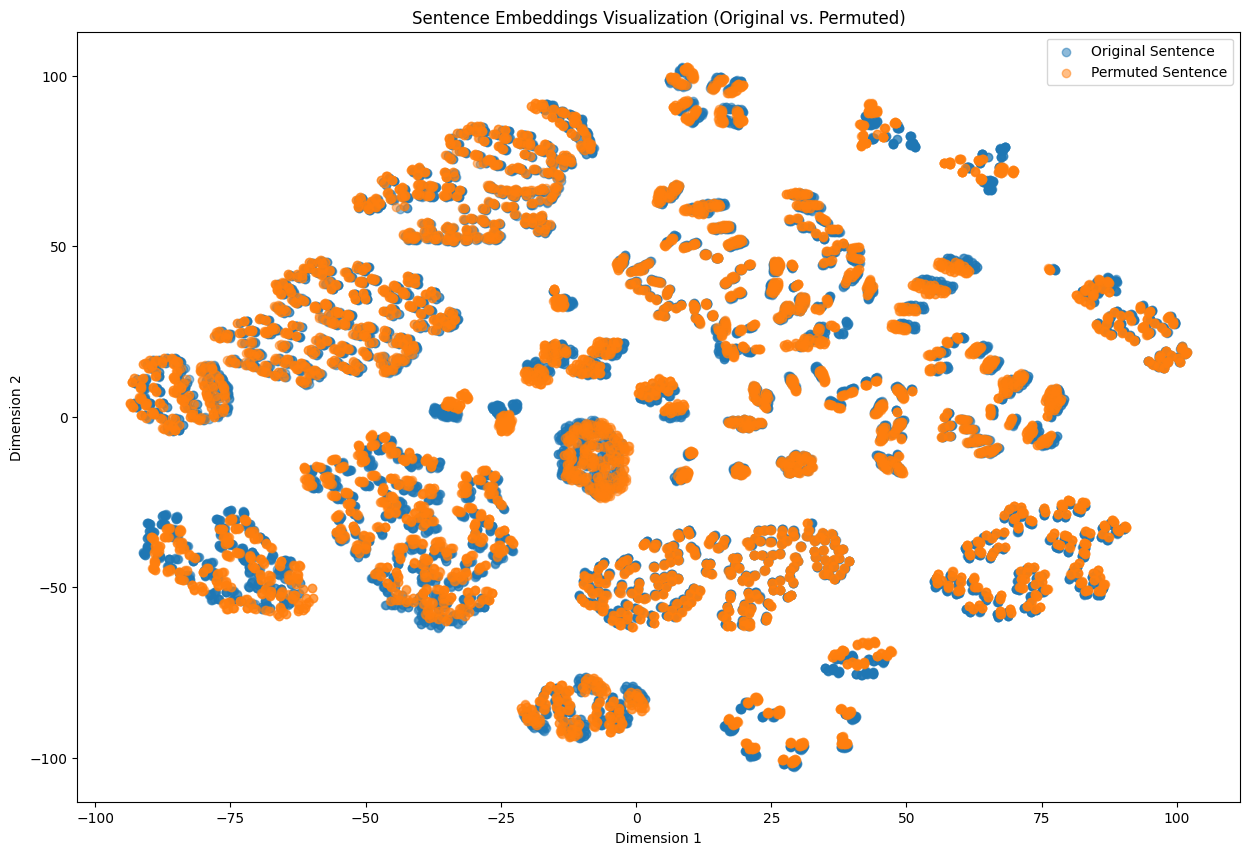

In [10]:
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def sentence_embedding(sentence):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])

    return np.mean(word_embeddings, axis=0)


sentence_vectors_original = []
sentence_vectors_permuted = []

for sentence in sentences:
    sentence_vector_original = sentence_embedding(sentence)
    sentence_vectors_original.append(sentence_vector_original)

for sentence_permuted in sentences_permuted[::number_of_permutations]:
    sentence_vector_permuted = sentence_embedding(sentence_permuted)
    sentence_vectors_permuted.append(sentence_vector_permuted)

sentence_vectors_original = np.array(sentence_vectors_original)
sentence_vectors_permuted = np.array(sentence_vectors_permuted)


tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
sentence_vectors_original_2d = tsne.fit_transform(sentence_vectors_original)
sentence_vectors_permuted_2d = tsne.fit_transform(sentence_vectors_permuted)

plt.figure(figsize=(15, 10))
plt.scatter(sentence_vectors_original_2d[:, 0], sentence_vectors_original_2d[:, 1], alpha=0.5, label="Original Sentence")
plt.scatter(sentence_vectors_permuted_2d[:, 0], sentence_vectors_permuted_2d[:, 1], alpha=0.5, label="Permuted Sentence")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Sentence Embeddings Visualization (Original vs. Permuted)")
plt.legend()
plt.show()

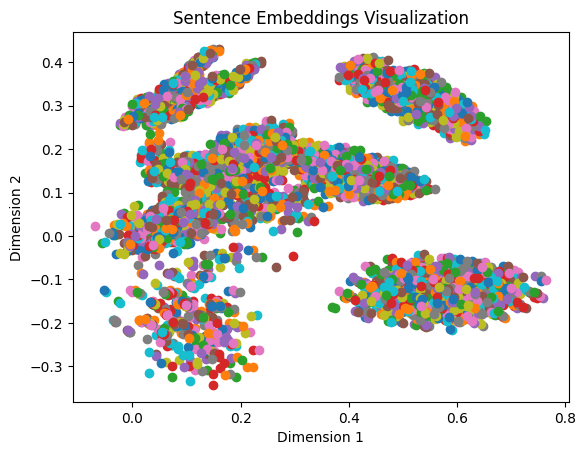

In [11]:
#VIZUALIZACE VET BEZ PERMUTACI
import numpy as np

def sentence_embedding(sentence):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0)


for sentence in sentences:
    sentence_vector = sentence_embedding(sentence)
    plt.scatter(x=sentence_vector[0], y=sentence_vector[1])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Sentence Embeddings Visualization")
plt.show()

Vizualizace pri jinem spusteni:


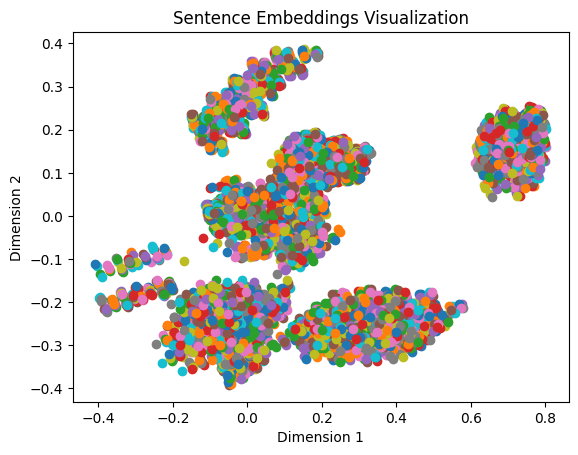

In [12]:
mapping_targets = {'p': 'poisonous', 'e': 'eadible'}

targets_df = pd.DataFrame(data=mushroom.data.targets)
targets_df.columns = ['class']
targets_df['class'] = targets_df['class'].map(mapping_targets)
targets_df.head()

class
0  poisonous
1    eadible
2    eadible
3  poisonous
4    eadible

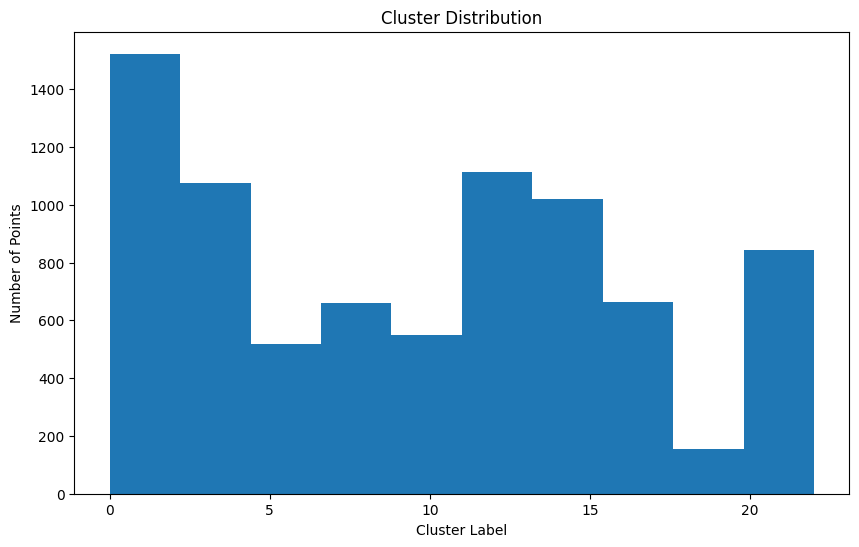

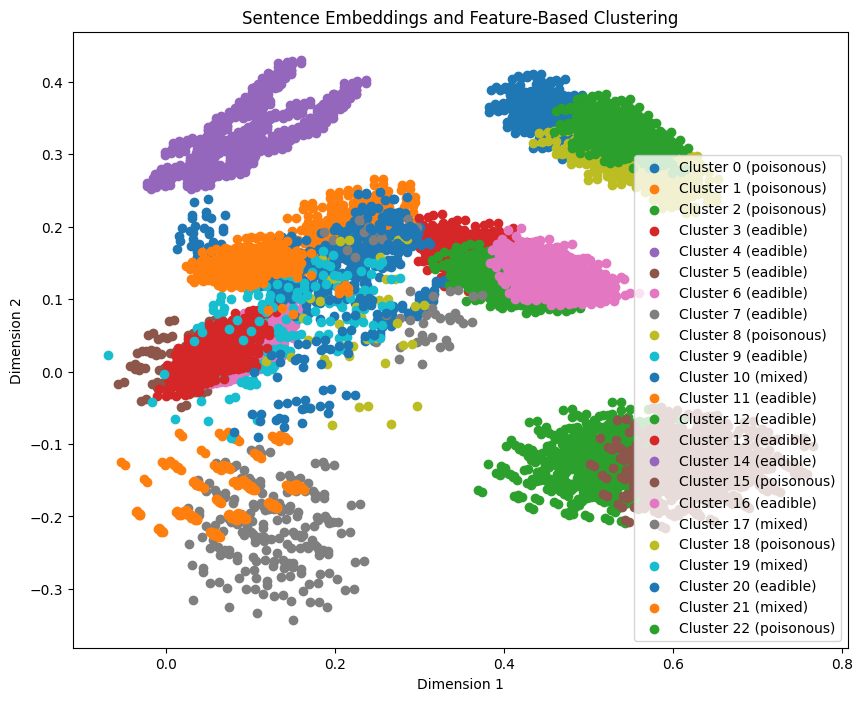

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


def sentence_embedding(sentence):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0)

sentence_vectors = [sentence_embedding(sentence) for sentence in sentences]
sentence_vectors = np.array(sentence_vectors)

kmeans = KMeans(n_clusters=23, random_state=0)
kmeans.fit(sentence_vectors)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.hist(cluster_labels)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.title("Cluster Distribution")
plt.show()

cluster_labels_to_class = {}
for i, label in enumerate(cluster_labels):
    if label not in cluster_labels_to_class:
        cluster_labels_to_class[label] = targets_df['class'][i]
    else:
        if cluster_labels_to_class[label] != targets_df['class'][i]:
            cluster_labels_to_class[label] = 'mixed'

plt.figure(figsize=(10, 8))
for cluster_label in set(cluster_labels):
    cluster_points = sentence_vectors[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_label} ({cluster_labels_to_class[cluster_label]})")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Sentence Embeddings and Feature-Based Clustering")
plt.legend()
plt.show()

Clustry z jinych spusteni kodu:

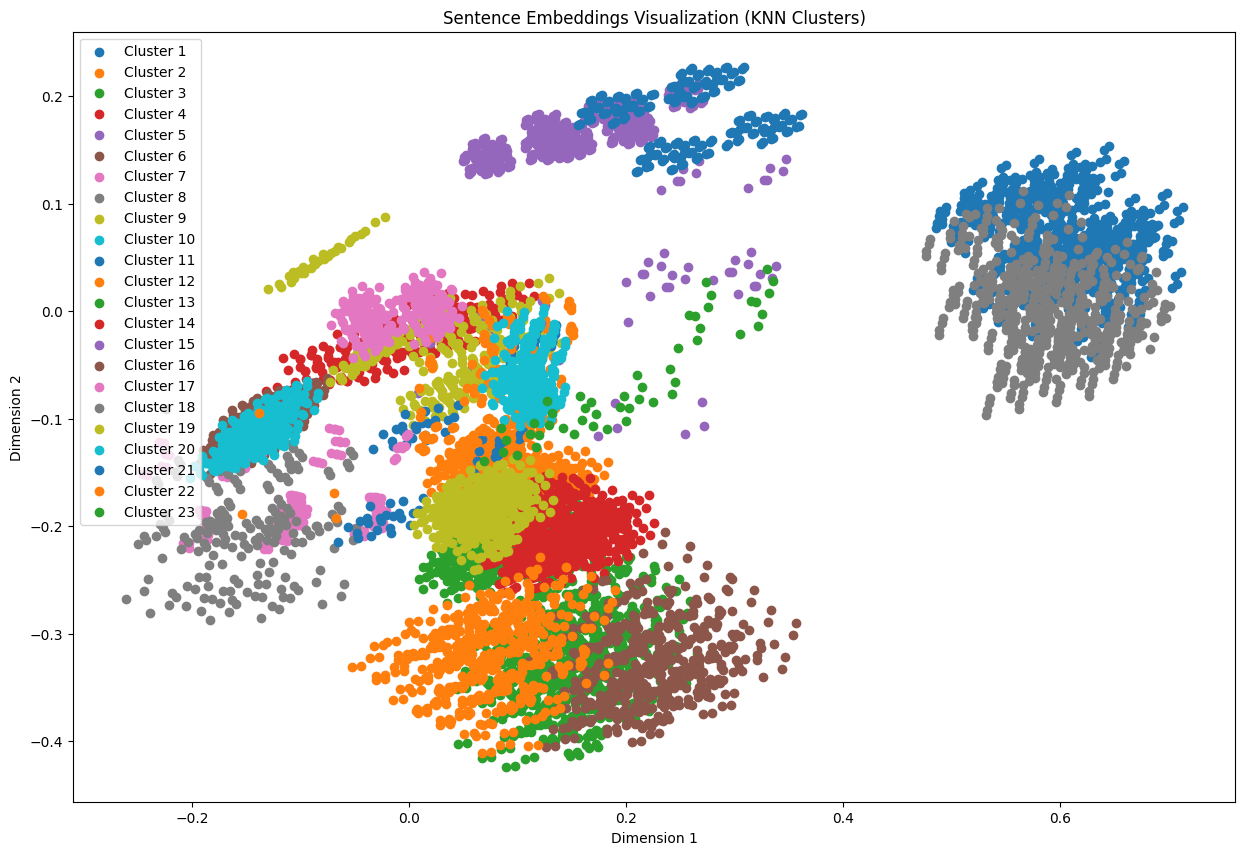



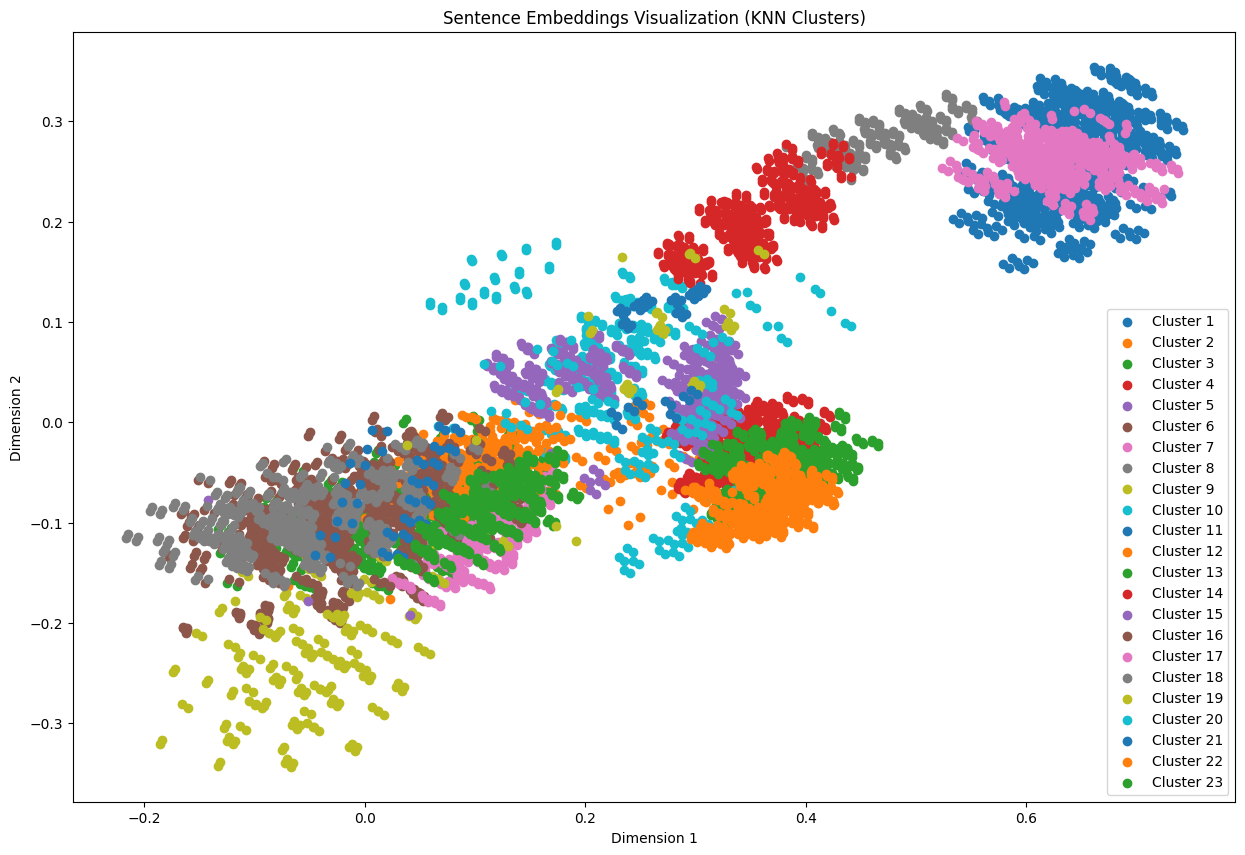

Points classified as mixed: 664


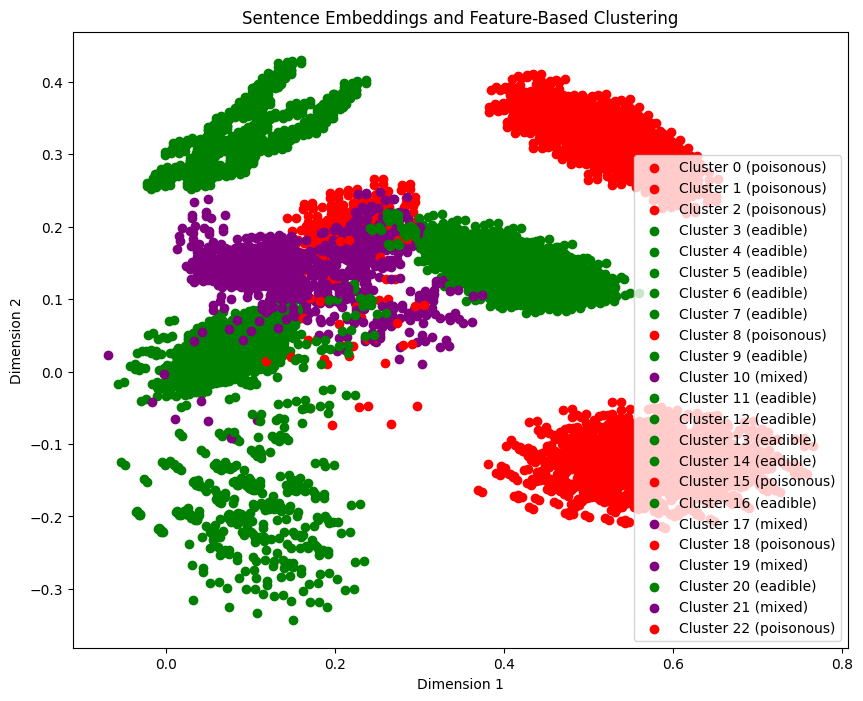

All edible cluster data indexes: []
All poisonous cluster data indexes: [0, 3, 8, 13, 17, 18, 19, 21, 25, 31, 37, 43, 53, 54, 78, 81, 114, 120, 135, 138, 180, 185, 1816, 2128, 2178, 2238, 2385, 2443, 2533, 2536, 2539, 2566, 2571, 2594, 2605, 2697, 2766, 2770, 2903, 2926, 2937, 2990, 3001, 3003, 3009, 3016, 3017, 3027, 3034, 3040, 3041, 3060, 3062, 3064, 3069, 3073, 3075, 3078, 3082, 3085, 3087, 3089, 3090, 3091, 3093, 3102, 3103, 3109, 3122, 3138, 3141, 3152, 3159, 3161, 3164, 3166, 3168, 3173, 3179, 3187, 3188, 3190, 3193, 3199, 3201, 3205, 3208, 3211, 3226, 3231, 3233, 3235, 3239, 3243, 3245, 3246, 3248, 3259, 3264, 3265, 3269, 3274, 3277, 3280, 3281, 3284, 3298, 3300, 3304, 3313, 3323, 3328, 3334, 3339, 3341, 3349, 3352, 3358, 3362, 3363, 3372, 3379, 3389, 3399, 3402, 3417, 3425, 3432, 3437, 3439, 3447, 3451, 3453, 3465, 3473, 3479, 3488, 3490, 3492, 3496, 3506, 3508, 3511, 3513, 3522, 3533, 3539, 3544, 3556, 3559, 3565, 3567, 3570, 3572, 3581, 3594, 3597, 3599, 3604, 3606, 3607, 36

In [14]:
def sentence_embedding(sentence):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0)

sentence_vectors = [sentence_embedding(sentence) for sentence in sentences]
sentence_vectors = np.array(sentence_vectors)

kmeans = KMeans(n_clusters=23, random_state=0)
kmeans.fit(sentence_vectors)
cluster_labels = kmeans.labels_

cluster_counts = np.bincount(cluster_labels)

cluster_labels_to_class = {}
mixed_counts = 0
cluster_indexes = {}
all_edible_indexes = []
all_poisonous_indexes = []

for i, label in enumerate(cluster_labels):
    if label not in cluster_labels_to_class:
        cluster_labels_to_class[label] = targets_df['class'][i]
        cluster_indexes[label] = [i]

    else:
        if cluster_labels_to_class[label] != targets_df['class'][i]:
            cluster_labels_to_class[label] = 'mixed'
            mixed_counts += 1
        cluster_indexes[label].append(i)


    if cluster_labels_to_class[label] == 'edible':
            all_edible_indexes.append(i)
    if cluster_labels_to_class[label] == 'poisonous':
            all_poisonous_indexes.append(i)

print(f"Points classified as mixed: {mixed_counts}")

poisonous_color = 'red'
eadible_color = 'green'
mixed_color = 'purple'

def get_cluster_color(label):
    if cluster_labels_to_class[label] == 'mixed':
        return mixed_color
    if cluster_labels_to_class[label] == 'poisonous':
        return poisonous_color
    else:
        return eadible_color

plt.figure(figsize=(10, 8))
for cluster_label in set(cluster_labels):
    cluster_points = sentence_vectors[cluster_labels == cluster_label]
    color = get_cluster_color(cluster_label)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_label} ({cluster_labels_to_class[cluster_label]})", c=color)

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Sentence Embeddings and Feature-Based Clustering")

plt.legend()
plt.show()

print("All edible cluster data indexes:", all_edible_indexes)
print("All poisonous cluster data indexes:", all_poisonous_indexes)

#Proc se nevypisou i eadible indexy??

#Algoritmus je dosti nahodny, minule bylo bodu klasifikovanych jako mixed ~950

<ipython-input-3-3da15fe2124d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(mapping)


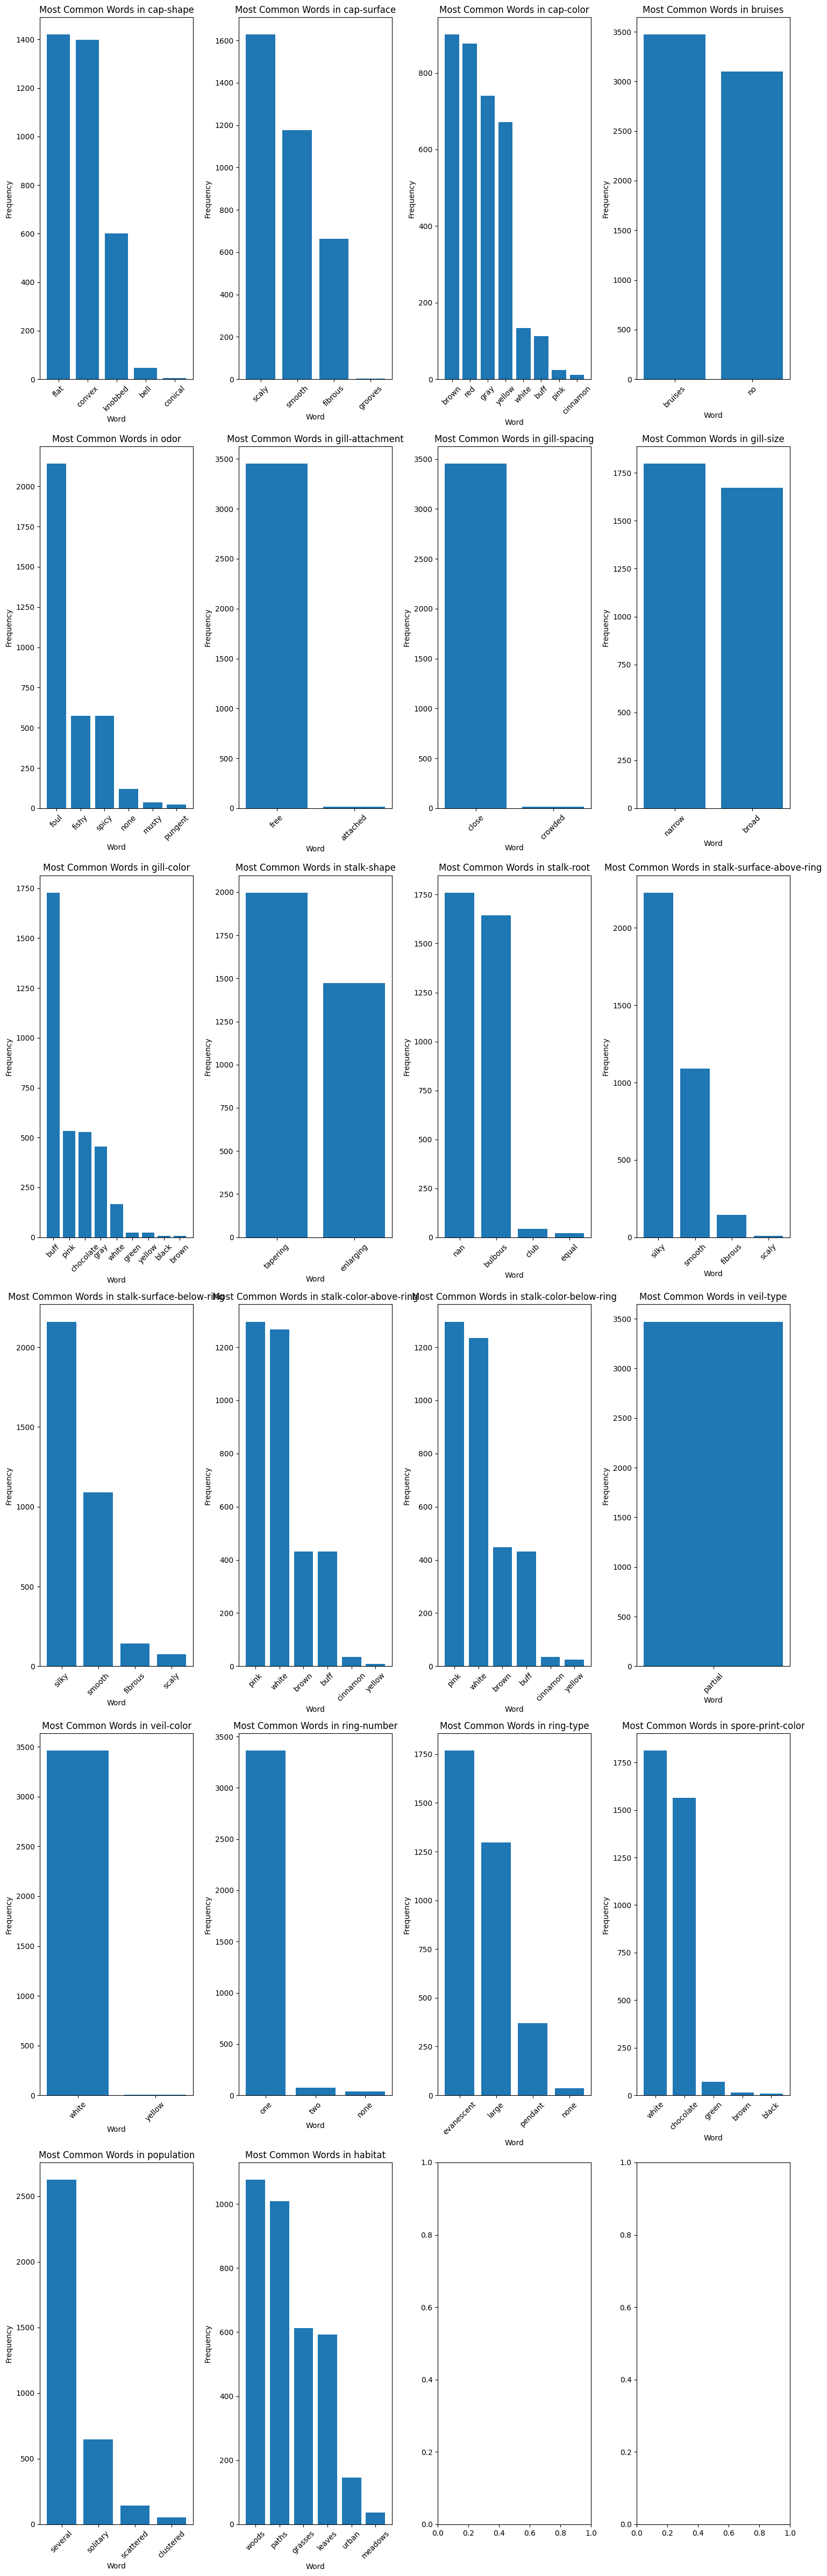

In [21]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_word_frequency_histograms(df, plots_per_row=4):


    num_cols = len(df.columns)
    num_rows = (num_cols + plots_per_row - 1) // plots_per_row

    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, 8 * num_rows))

    for i, column in enumerate(df.columns):
        row = i // plots_per_row
        col = i % plots_per_row
        ax = axes[row, col]

        text_data = df[column].astype(str)
        words = " ".join(text_data).split()

        word_counts = Counter(words)
        top_words = word_counts.most_common(10)
        words, counts = zip(*top_words)

        ax.bar(words, counts)
        ax.set_xlabel("Word")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Most Common Words in {column}")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


mushroom_raw = pd.DataFrame(data=mushroom.data.features)
poisonous_raw = mushroom_raw.iloc[all_poisonous_indexes]
poisonous_df = preprocess_mushroom_data(poisonous_raw)
plot_word_frequency_histograms(poisonous_df)

